<a href="https://colab.research.google.com/github/samriddhi-m1227/MachineLearning/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to follow the evaluation in the ML Model
1. Data Preparation
2. Train - Test Split
3. Model Training
4. Model Evaluation using Metrics
5. Cross_validation
6. Confusion Matrix
7. Precision-Recall Curve
8. ROC Curve

## 1. Data Preparation

In [1]:
#Importing all the important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection library
from sklearn.model_selection import train_test_split, cross_val_score

#Metrics Library
from sklearn.metrics import(accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, precision_recall_curve,
roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()


#Loading dataset
from sklearn.datasets import load_iris, fetch_california_housing

#Algorithm for Classification and Regression
from sklearn.linear_model import LogisticRegression, LinearRegression


# Evaluation Metrics for Regression Model


1. Mean Squared Errror (MSE) : Measures the squared difference between the actual and predicted value.

2. Root Mean Squared Error (RMSE): Square roor of MSE

3. Mean Absolute Error (MAE): Measures the average absolute differnece between the actual and predicted value. Less Sensitive to Outliers.

4. R2 Score: Proprotions of Variance in the target variable whose values ranges from 0 to 1


# Evaluation Metrics for Classification Model

1. Acuuracy: Total porportions of the correctly classified data from the total classified data and can be misleading for imbalanced datasets.

2. Precision: True positive out of total positive predictions, indicated how many are relevant.

3. Recall (Sensitivity): How many relevant items are selected.

4. F1_Score: Used for imbalanced dataset, to make balance between precision and recall.

5. Receiver Opearting Characteristics (ROC) - Area Under Curve (AUC) Curve:
Measures the models ability to distinguish between classes. AUC ranges between 0.5 (random) and 1 (perfect).

## 2. Train - Test Splitting

In [2]:
#Classification - IRIS

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

#Splitting into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state= 40)

In [3]:
#Regression - HOUSING

house = fetch_california_housing()
X_house = house.data
y_house = house.target

# Split into training and testing sets
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house, y_house, test_size=0.2,random_state=40)

## 3. Model Training

In [4]:
# Classification Model Training using Logistics
clf=LogisticRegression(max_iter=200)
clf.fit(X_train_iris, y_train_iris)

#Prediction using test data
y_pred_iris=clf.predict(X_test_iris)

In [5]:
# Regression Model Training using Linear
reg=LinearRegression()
reg.fit(X_train_house, y_train_house)

#Prediction using test data
y_pred_house=reg.predict(X_test_house)

## 4. Model Evaluation using Metrics

In [6]:
# Classification Metrics

accuracy= accuracy_score(y_test_iris, y_pred_iris)
precision= precision_score(y_test_iris, y_pred_iris, average='weighted')
f1= f1_score(y_test_iris, y_pred_iris, average='weighted')
recall= recall_score(y_test_iris, y_pred_iris, average='weighted')

print(f"Accuracy:  {accuracy}")
print(f"Precision:  {precision}")
print(f"Recall:  {recall}")
print(f"F1:  {f1}")


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0


In [7]:
#Regression Metrics

mse=mean_squared_error(y_test_house,y_pred_house)
rmse=mean_squared_error(y_test_house,y_pred_house, squared=False)
mae=mean_absolute_error(y_test_house,y_pred_house)
r2=r2_score(y_test_house,y_pred_house)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.5417517275769279
RMSE: 0.7360378574346077
MAE: 0.5389572480555144
R2: 0.6075794091011277


# 5. Cross Validation

In [8]:
#Classification CV

cv_class=cross_val_score(clf, X_iris, y_iris, cv=5)
print(f"Cross Validaton Score: {cv_class}")
print(f"Mean CV Score: {cv_class.mean()}")


Cross Validaton Score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean CV Score: 0.9733333333333334


In [9]:
#Regression CV

cv_reg = cross_val_score(reg, X_house, y_house, cv=5, scoring='neg_mean_squared_error')
print(f"Cross Validation Score: {cv_reg}")
print(f"Mean CV Score: {cv_reg.mean()}")

Cross Validation Score: [-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]
Mean CV Score: -0.5582901717686811


# 6. Confusion Matrix

1. True positive: All the correctly predicted positive results
2. True negative: All the correctly predicted negative results.
3. False positive (Type I error) : When the result is actually negative but prediction is positive.
4. False Negative (Type II error) : When results are actually positive, but the prediction is negative.

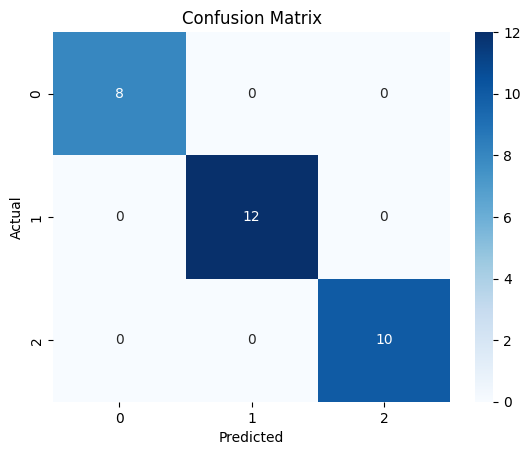

In [10]:
#Classification CM

cm=confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
cm_df=pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1', 'Predicted 2',], index=['Actual 0', 'Actual 1', 'Actual 2'])
print(cm_df)

          Predicted 0  Predicted 1  Predicted 2
Actual 0            8            0            0
Actual 1            0           12            0
Actual 2            0            0           10


# 7. Precision Recall Curve

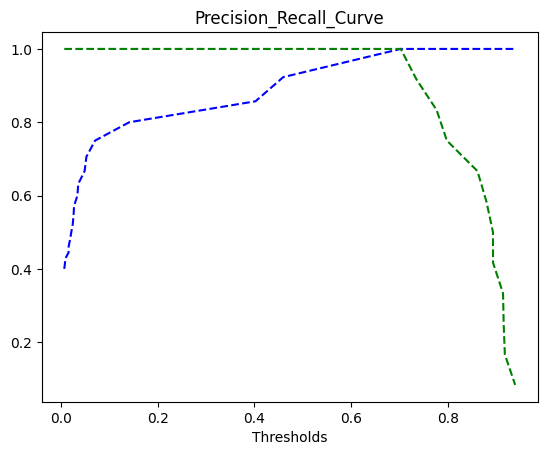

In [12]:
#Predict the probabilities of positive results
scores= clf.predict_proba(X_test_iris)[:,1]

#P_R pair value for different threshold
pre, rec, thresholds = precision_recall_curve(y_test_iris, scores, pos_label = 1)

plt.plot(thresholds, pre[:-1], 'b--', label='Precision')
plt.plot(thresholds, rec[:-1],'g--',  label='Recall')
plt.xlabel('Thresholds')
plt.title('Precision_Recall_Curve')
plt.show()